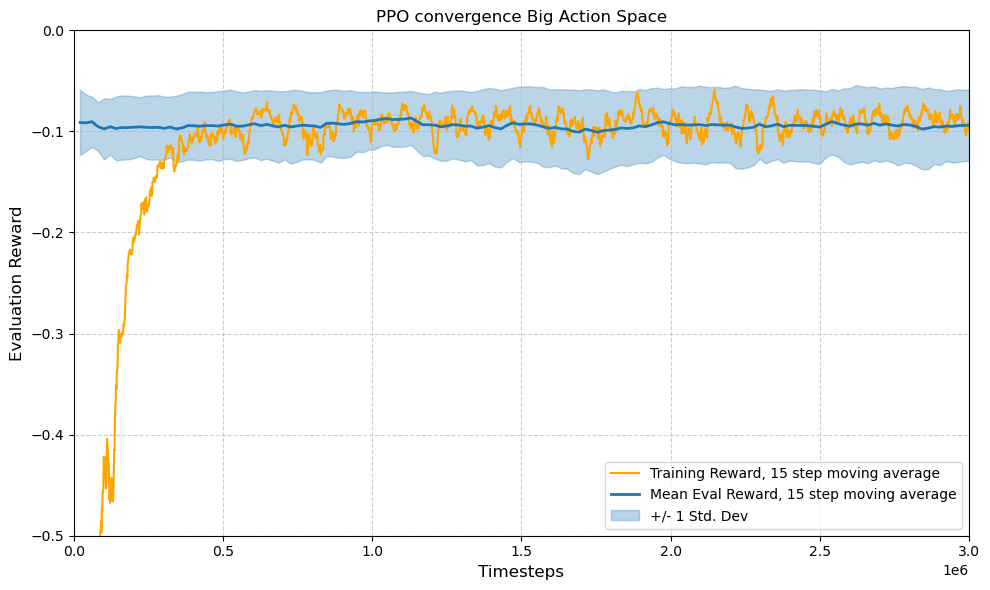

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv

data = np.load('./logs/eval_logs/ev/evaluations.npz')
timesteps = data['timesteps'].flatten()
mean_rewards = (data['results']).mean(axis = 1)
std_rewards = (data['results']).std(axis = 1)

train_l = []
train_r = []
with open('eval_logs-Train.monitor.csv') as fp:
    next(fp)
    incsv = csv.DictReader(fp)
    for row in incsv:           
        train_r.append(float(row['r']))   
        train_l.append(float(row['l']))  

timesteps_s = pd.Series(timesteps)
mean_s = pd.Series(mean_rewards)
std_s = pd.Series(std_rewards)

mean_smoothed = mean_s.rolling(window = 15, min_periods=1).mean()
std_smoothed = std_s.rolling(window=15, min_periods=1).mean()

train_smoothed = pd.Series(train_r).rolling(window = 15, min_periods=1).mean()

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(train_l),train_smoothed, label = 'Training Reward, 15 step moving average', color = 'orange')
plt.plot(timesteps_s, mean_smoothed, label = 'Mean Eval Reward, 15 step moving average', linewidth = 2)
plt.fill_between(timesteps_s, mean_smoothed - std_smoothed, mean_smoothed + std_smoothed, alpha = 0.3, label = '+/- 1 Std. Dev', color = 'tab:blue')

plt.ylim([-0.5,0])
plt.xlim([0,3e6])
plt.xlabel('Timesteps', fontsize = 12)
plt.ylabel('Evaluation Reward', fontsize = 12)
plt.title('PPO convergence Big Action Space')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.legend()
plt.tight_layout()
plt.show()